In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# minor ticks
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [2]:
def plot(df):
    axes = sns.heatmap(df.sort_index(), square=True, cbar=False, yticklabels=True)

    # Grid
    locator = MultipleLocator(1)
    locator.MAXTICKS = 2000
    axes.xaxis.set_minor_locator(locator)
    axes.yaxis.set_minor_locator(locator)
    plt.grid(b=True, axis='x', which='minor', color='#666666', linestyle='-')
    plt.grid(b=True, axis='y', which='minor', color='#666666', linestyle='-')

    # Labels
    axes.tick_params('x', top=True, labeltop=True, labelrotation=60)

In [3]:
day = pd.read_csv("CMIP6.csv", index_col="dataset_id", dtype={'pr': np.int32, 'psl': np.int32, 'sftlf': np.int32, 'tas': np.int32, 'tasmin': np.int32, 'tasmax': np.int32})
mon = pd.read_csv("CMIP6Amon.csv", index_col="dataset_id", dtype={'pr': np.int32, 'psl': np.int32, 'sftlf': np.int32, 'tas': np.int32, 'tasmin': np.int32, 'tasmax': np.int32})

In [4]:
mi = pd.MultiIndex.from_product([['day', 'mon'], ['pr', 'psl', 'sftlf', 'tas', 'tasmin', 'tasmax']], names=['freq', 'var'])
merged = day.merge(mon, on="dataset_id", how="outer").fillna(0)
merged.columns = mi

In [5]:
merged.head()

freq                                               day                       \
var                                                 pr psl sftlf tas tasmin   
dataset_id                                                                    
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn    1   1     1   1      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...   0   1     0   1      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...   0   1     0   1      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...   0   1     0   1      1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...   0   1     0   1      1   

freq                                                      mon                \
var                                                tasmax  pr psl sftlf tas   
dataset_id                                                                    
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn       1   1   1     1   1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...      1   0   1     0   1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...      1   0   1     0   1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...      1   0   1     0   1   
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...      1   0   1     0   1   

freq                                                              
var                                                tasmin tasmax  
dataset_id                                                        
CMIP6.CMIP.AS-RCEC.TaiESM1.historical.r1i1p1f1.gn       0      0  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r1i1p1f...      1      1  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r2i1p1f...      1      1  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r3i1p1f...      1      1  
CMIP6.CMIP.AWI.AWI-CM-1-1-MR.historical.r4i1p1f...      1      1

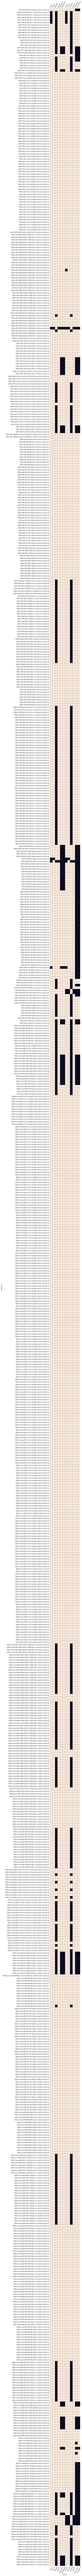

In [6]:
fig, ax = plt.subplots()
plot(merged)
fig.set_size_inches(7, 400, forward=True)
plt.show()